In [1]:
# Import all necessary libraries
import json
import dateutil
import operator
import numpy as np
import pandas as pd
from nltk import ngrams
from nltk import bigrams
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [2]:
# Path to the stored tweets
path_tweets = 'build/'

# Name of the tweets-json
name_json = 'Tweets_Donald_Trump.json'
#name_json = 'Tweets_Hillary_Clinton.json'

name = name_json.split('.')[0].split('_', 1)[-1].replace('_', ' ')

In [3]:
# Variable to store the data
data = []

# Open the stored Tweets
with open(path_tweets+name_json) as f:
    # Iterate over every line
    for line in f:
        # Load the Tweet's json-data
        tweet = json.loads(line)
        
        # Parse the date and retrieve the data
        created_at = dateutil.parser.parse(tweet['created_at'])
        contributors = tweet['contributors']
        coordinates = tweet['coordinates']
        favorite_count = tweet['favorite_count']
        geo = tweet['geo']
        lang =tweet['lang']
        place = tweet['place']
        retweet_count = tweet['retweet_count']
        retweeted = tweet['retweeted']
        text = tweet['text']
        truncated = tweet['truncated']
        
        # Store the data of each Tweet
        data.append([created_at, contributors, coordinates, favorite_count, geo, lang, place, retweet_count, retweeted, text, truncated])

In [4]:
# Store the data in a DataFrame
df = pd.DataFrame(data, columns=['created_at', 'contributors', 'coordinates', 'favorite_count', 'geo', 'lang', 'place', 'retweet_count', 'retweeted', 'text', 'truncated'])
# Drop empty columns
df = df.dropna(axis=1, how='all')

In [5]:
# Examine the DataFrame's shape
print(df.shape)
print(list(df.columns))

(3217, 10)
['created_at', 'coordinates', 'favorite_count', 'geo', 'lang', 'place', 'retweet_count', 'retweeted', 'text', 'truncated']


In [6]:
# Use a nice plot style
plt.style.use('ggplot')

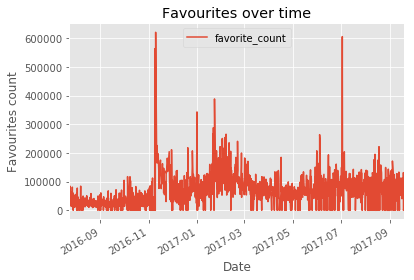

In [7]:
# Plot the account's activity and favourites
df.plot(x='created_at', y='favorite_count')
plt.title('Favourites over time')
plt.xlabel('Date')
plt.ylabel('Favourites count')
plt.show()

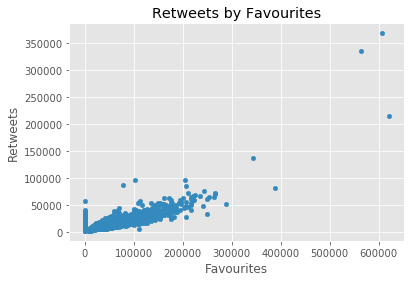

In [8]:
# Plot the relation between retweets and favourites
df.plot.scatter(x='favorite_count', y='retweet_count')
plt.title('Retweets by Favourites')
plt.xlabel('Favourites')
plt.ylabel('Retweets')
plt.show()

In [9]:
# Examine the used languages 
for lang in df['lang'].value_counts().index.tolist():
    df_temp = df[df['lang']==lang]['text']
    for tweet in df_temp.head():
        print('{} {}: {}\n'.format(df_temp.shape[0], lang, tweet))

3146 en: Happy 70th Birthday @CIA! https://t.co/CU3gOZMf7J

3146 en: Happy 70th Birthday @USAirForce! https://t.co/snkXO40vXM

3146 en: RT @realDonaldTrump: Loser terrorists must be dealt with in a much tougher manner.The internet is their main recruitment tool which we must…

3146 en: RT @realDonaldTrump: The travel ban into the United States should be far larger, tougher and more specific-but stupidly, that would not be…

3146 en: Important meetings and calls scheduled for today. Military and economy are getting stronger by the day, and our enemies know it. #MAGA

64 und: RT @Team_Trump45: @realDonaldTrump  https://t.co/Vu56q4z2XJ

64 und: RT @Team_Trump45: @realDonaldTrump  https://t.co/MOnPkuKxQM

64 und: RT @Team_Trump45: @realDonaldTrump  https://t.co/1zo6zc2pxt

64 und: RT @Team_Trump45: @realDonaldTrump  https://t.co/dw0zKYtyfT

64 und: #NeverForget https://t.co/rmQ1a5bDon

1 vi: It was an honor to welcome the Prime Minister of Vietnam, Nguyễn Xuân Phúc to the @WhiteHouse this 

In [10]:
# Read the most popular tweets
for text in df[df['retweet_count']>100000][['text', 'retweet_count']].sort_values(by='retweet_count', ascending=False).values:
    print(text[1], '\n', text[0], '\n')

368439 
 #FraudNewsCNN #FNN https://t.co/WYUnHjjUjg 

335886 
 TODAY WE MAKE AMERICA GREAT AGAIN! 

214599 
 Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before 

137120 
 Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don't know what to do. Love! 



In [11]:
# Find the most used hashtags
hashtags = {}
# Iterate over each Tweet
for tweet in df['text'].values:
    # Iterate over each word
    for word in tweet.split(' '):
        # Check for hashtags
        if word.startswith('#'):
            # Remove punctuation
            word = word.replace(',', '').replace('.', '').lower()
            # Increase hashtag count
            if word in hashtags.keys():
                hashtags[word] += 1
            else:
                hashtags[word] = 1
            
# Sort word counts by their occurence
x = sorted(hashtags.items(), key=operator.itemgetter(1), reverse=True)
x

[('#maga', 68),
 ('#draintheswamp', 50),
 ('#bigleaguetruth', 45),
 ('#debate', 39),
 ('#imwithyou', 26),
 ('#crookedhillary', 24),
 ('#americafirst', 24),
 ('#debates2016', 21),
 ('#trumppence16', 20),
 ('#vpdebate', 16),
 ('#obamacare', 12),
 ('#hurricaneharvey', 11),
 ('#maga!', 11),
 ('#icymi-', 11),
 ('#makeamericagreatagain', 11),
 ('#debates', 11),
 ('#maga🇺🇸', 10),
 ('#usa🇺🇸', 9),
 ('#fakenews', 9),
 ('#maga…', 8),
 ('#icymi:', 8),
 ('#makeamericagreatagain!', 8),
 ('#draintheswamp!', 8),
 ('#harvey', 7),
 ('#trumptrain', 7),
 ('#debatenight', 7),
 ('#thankyoutour2016', 6),
 ('#obamacarefail', 6),
 ('#fake', 5),
 ('#americafirst!', 5),
 ('#maga\ntickets:', 5),
 ('#neverhillary', 5),
 ('#americafirst🇺🇸', 4),
 ('#usa', 4),
 ('#1', 4),
 ('#votetrumppence16', 4),
 ('#lesm', 4),
 ('#votetrump', 4),
 ('#hurricaneirma', 3),
 ('#thefive', 3),
 ('#uswomensopen', 3),
 ('#weeklyaddress🇺🇸', 3),
 ('#g20summit', 3),
 ('#hannity', 3),
 ('#nato', 3),
 ('#obamacare!', 3),
 ('#peotus', 3),
 ('#i

In [12]:
# Find the most used words
stop = stopwords.words('english')

words = {}
# Iterate over each Tweet
for tweet in df['text'].values:
    # Iterate over each word
    for word in tweet.split(' '):
        # Fix puncuation
        word = word.lower().replace(',', '').replace('.', '').replace('!', '')
        # Check for english- and customised stopwords
        if word not in stop and word not in ['-', '', 'rt', '&amp;']:
            # Increase word count
            if word in words.keys():
                words[word] += 1
            else:
                words[word] = 1
                
# Sort word counts by their occurence
x = sorted(words.items(), key=operator.itemgetter(1), reverse=True)
x

[('great', 458),
 ('thank', 331),
 ('hillary', 225),
 ('people', 203),
 ('us', 198),
 ('america', 164),
 ('trump', 163),
 ('clinton', 155),
 ('today', 153),
 ('new', 144),
 ('join', 142),
 ('media', 141),
 ('get', 139),
 ('president', 136),
 ('big', 136),
 ('make', 135),
 ('news', 132),
 ('jobs', 131),
 ('@realdonaldtrump', 120),
 ('going', 116),
 ('time', 113),
 ('country', 109),
 ('american', 107),
 ('crooked', 107),
 ('fake', 107),
 ('vote', 102),
 ('many', 99),
 ('would', 97),
 ('never', 95),
 ('election', 92),
 ('back', 89),
 ('much', 82),
 ('bad', 82),
 ('#maga', 81),
 ('one', 80),
 ('obama', 79),
 ('north', 77),
 ('must', 76),
 ('last', 75),
 ('states', 73),
 ('day', 72),
 ('years', 71),
 ('win', 71),
 ('together', 71),
 ('obamacare', 71),
 ('even', 69),
 ('said', 69),
 ('state', 68),
 ('like', 68),
 ("don't", 68),
 ('united', 65),
 ('first', 65),
 ('democrats', 64),
 ('tomorrow', 63),
 ('want', 63),
 ('russia', 62),
 ('healthcare', 60),
 ('florida', 60),
 ('good', 59),
 ('honor

In [13]:
# Create a Markov-Chain to generate new (poorly written) Tweets

# Markov-Chain-dict
markov = {}

#Words to start a Tweet
beginnings = []

# Iterate over each Tweet
for tweet in df['text'].values:
    # Split the Tweet in bigrams
    grams = bigrams(tweet.lower().split(' '))
    # Iterate over each bigram
    for i, bigram in enumerate(grams):
        # Append the first word for possible beginnings
        if i==0:
            beginnings.append(bigram[0])
        # Add each bigram to the Markov-Chain and count their occourences
        if bigram[0] not in markov.keys():
            markov[bigram[0]]={bigram[1]:1}
        else:
            if bigram[1] not in markov[bigram[0]].keys():
                markov[bigram[0]][bigram[1]]=1
            else:
                markov[bigram[0]][bigram[1]] += 1

In [14]:
# Generate a new (poorly written) Tweet
new_tweet = ''

# Choose a random word to start with
word = np.random.choice(beginnings, 1)[0]
new_tweet += word

# Iterate until a Tweet-end is reached
while True:
    try:
        next_words = []
        # Get the next possible words
        for elem in markov[word].items():
            next_words.extend([elem[0]] * elem[1])
        # Choose a random next word
        word = np.random.choice(next_words, 1)[0]
        new_tweet += ' ' + word
    except:
        break
        
new_tweet

'"@donaldjtrumpjr: company gouging price will respond to the heroes whose decisions have paul ryan owens\' dignified transfer yesterday in life!'

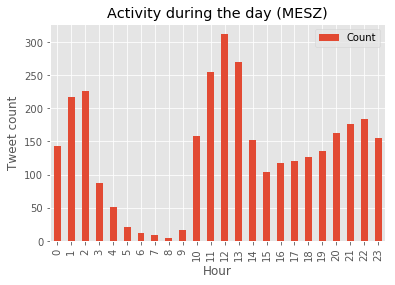

In [15]:
# Evaluate the activity over the day

# Group the Tweets by their hour
df_time = df['created_at'].groupby(pd.DatetimeIndex(df.created_at).hour).count().to_frame().rename(columns={'created_at':'Count'})

# Add inactive hours
for time in [i for i in range(0, 24)]:
    if time not in df_time.index.tolist():
        df_time.loc[time] = 0
# Sort the indices
df_time = df_time.sort_index()

df_time.plot(kind='bar')
plt.title('Activity during the day (MESZ)')
plt.xlabel('Hour')
plt.ylabel('Tweet count')
plt.show()
plt.savefig('build/Account_Activity_per_Hour_{}.pdf'.format(name))

In [16]:
def plotBokeh(df):
    from bokeh.plotting import figure, show, ColumnDataSource, output_file
    from bokeh.models import PanTool, ResetTool, SaveTool, WheelZoomTool, HoverTool

    # Set the labels
    title = 'Word similarities in the Tweets of {}'.format(name)
    xlabel = 'x axis'
    ylabel = 'y axis'

    output_file('build/Word_Similarities_{}.html'.format(name))

    # Create the internal data-structure
    source = ColumnDataSource(data=dict(
        x=df['x'],
        y=df['y'],
        text=df['label']
    ))

    # Load useful tools
    pan = PanTool()
    reset = ResetTool()
    save = SaveTool()
    zoom = WheelZoomTool()
    
    #hover = HoverTool(tooltips=[("Word", "@text")])

    # Create the figure and plot the circles
    p = figure(plot_width=900, plot_height=600, tools=[pan, reset, save, zoom], active_scroll=zoom, title=title, toolbar_location="above")
    p.text('x', 'y', 'text', source=source)

    # Refine the layout
    p.xaxis.axis_label = xlabel
    p.yaxis.axis_label = ylabel

    show(p)

In [17]:
def cleanTweet(tweet):
    return tweet.lower().replace('.', '').replace(',', '').replace('-', '').replace(';', '').replace(':', '').replace("'", '').replace('@', '').replace('!', '').replace('?', '').replace('"', '')

In [18]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [19]:
stop = stopwords.words('english')

num = 5


words = {}
for tweet in df['text'].values:
    tweet = cleanTweet(tweet)
    for word in tweet.split():
        word = stemmer.stem(word)
        if len(word)>1 and not word.startswith('http'):
            if word not in words.keys():
                words[word] = 0
            else:
                words[word] += 1
            
words = {word for word, count in words.items() if count>num and word not in stop and word not in ['-', '&amp;']}
print(len(words))

loc_dict = {word:i for i, word in enumerate(words)}

dim = len(loc_dict)
matrix = np.zeros(shape=(dim, dim))

n = 9
for tweet in df['text'].values:
    tweet = cleanTweet(tweet)
    fivegrams = ngrams(tweet.split(), n)
    for grams in fivegrams:
        if grams[4] in loc_dict.keys():
            middle = loc_dict[stemmer.stem(grams[4])]
        
            for i in [0, 1, 2, 3, 5, 6, 7, 8]:
                try:
                    word = stemmer.stem(grams[i])
                    matrix[middle][loc_dict[word]] += 1
                except:
                    pass

990


/home/jm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: generator 'ngrams' raised StopIteration


In [20]:
# Compute the principle components and plot the first two components
la = np.linalg
U, s, Vh = la.svd(matrix, full_matrices=False)

df_pca = pd.DataFrame(U[:, :2], columns=['x', 'y'])
df_pca['label'] = list(words)

In [21]:
plotBokeh(df_pca)

/home/jm/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/jm/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/jm/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 990 / 990
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.682560
[t-SNE] Error after 175 iterations: 0.682560
t-SNE done! Time elapsed: 18.61977529525757 seconds


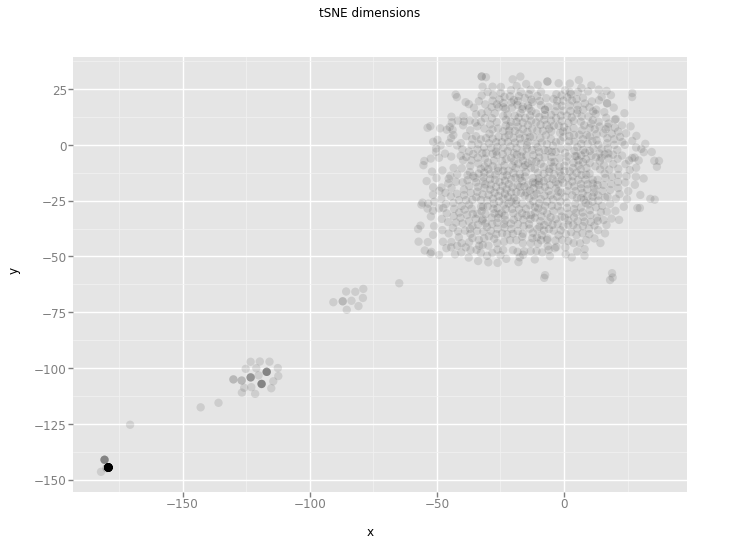

<ggplot: (-9223363264418435363)>

In [22]:
# Compute t-sne for the words
import time

from sklearn.manifold import TSNE

import pandas as pd
from ggplot import *

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
tsne_results = tsne.fit_transform(matrix)


print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df_tsne = pd.DataFrame(list(words), columns=['label'])
df_tsne['x'] = tsne_results[:,0]
df_tsne['y'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x', y='y') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions")
chart

In [23]:
plotBokeh(df_tsne)

# Word2Vec

In [42]:
from gensim.models import Word2Vec

tweets = []
for tweet in df['text']:
    tweets.append(tweet.lower().split())

account = Word2Vec(tweets, iter=50, min_count=10, workers=3)

wv = account.wv
word = list(wv.vocab.keys())
vec = [wv[key] for key in  word]




import time
from sklearn.manifold import TSNE
import pandas as pd
from ggplot import *

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(vec)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df_tsne = pd.DataFrame(list(word), columns=['label'])
df_tsne['x'] = tsne_results[:,0]
df_tsne['y'] = tsne_results[:,1]

plotBokeh(df_tsne)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 725 / 725
[t-SNE] Mean sigma: 1.347708
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.143929
[t-SNE] Error after 175 iterations: 1.143929
t-SNE done! Time elapsed: 8.858599185943604 seconds


In [57]:
account.most_similar('fake', topn=10)

[('fox', 0.6931905746459961),
 ('report', 0.6673704981803894),
 ('conference', 0.6142096519470215),
 ('dishonest', 0.5912315845489502),
 ('highly', 0.5775059461593628),
 ('biased', 0.5750504732131958),
 ('false', 0.5743117332458496),
 ('refuses', 0.5395843982696533),
 ('real', 0.538497805595398),
 ('reporting', 0.5346817970275879)]